In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

### 현재 코드에서는, 20분 간격으로 레이블을 지정해주고, 한번에 그린 케이스

In [ ]:
# Define the path
path = 'D:\\MultiModal\\Face_z_score\\C_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\CC_plot\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1']  # 'S2' 'S3'
people = ['C1', 'C2', 'C3', 'C4']

fps = 25  # Frames per second

for week in weeks:
    for step in steps:
        
        temp = {}
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                # data sampling, 500번째에 찍기 
                #df = df.iloc[::500, :]
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        # 플롯의 사이즈 조절
        plt.figure(figsize=(20, 10))

        for person in people:
            if person in temp:
                df = temp[person]
                plt.plot(df.index, df['box.size'], label=person)

        plt.xlabel('Time')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        
        
        # 시간을 매 10초씩 보여줄 수 있도록 세팅하는 부분.
        ax = plt.gca() # 현재 축 정보를 가져옴; 
        tick_labels = ax.get_xticklabels() # 현재 x축의 모든 레이블을 가져옴.
        tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*20))] # 리스트를 하나 생성하고, 20초 간격으로 x축 정보를 설정함.
        ax.set_xticks(ax.get_xticks()[::int(fps*20)]) # x축 틱 정보를 20초 간격으로 설정함. 
        ax.set_xticklabels(tick_labels_to_keep) # 앞에서 설정한 x tick 정보를 넣어줌.
        
        # y축의 경우, box size로 유지.
        plt.ylabel('Box Size')
        plt.title(f'{week}_{step} graph')
        plt.legend()

        # Adjust layout to give more space for the x-axis labels
        plt.subplots_adjust(bottom=0.5)

        # Show the plot
        plt.show()
        
        # # Save the plot to the specified path
        # plot_filename = f"{week}_{step}_graph.png"
        # plot_filepath = os.path.join(save_path, plot_filename)
        # plt.savefig(plot_filepath)
        # plt.close()  # Close the plot to avoid display

### 지금 코드에서는 위의 그래프 시간 중, 첨예하게 잘라서 데이터가 잘 있는지 확인해볼 것.

In [ ]:
path = 'D:\\MultiModal\\Face_z_score\\C_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1', 'S2']  # 'S2', 'S3'
people = ['C1', 'C2', 'C3', 'C4']

fps = 25  
time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]  
# 원하는 시간 간격으로 나누어서, 그래프를 출력해볼 수 있는 부분. || 분 간격 

# time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성, => 각 그룹별로 나누어 한번에 그릴 수 있도록 하기 위해서. 
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        for start_minute, end_minute in time_intervals:
            # 플롯 사이즈 조절.
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(minutes=start_minute)
            end_time = pd.Timedelta(minutes=end_minute)

            for person in people:
                if person in temp:
                    df = temp[person]
                    df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
                    if not df_interval.empty:
                        plt.plot(df_interval.index, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
            plt.legend()

            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            ax = plt.gca()
            tick_labels = ax.get_xticklabels()
            tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*20))]
            ax.set_xticks(ax.get_xticks()[::int(fps*20)])
            ax.set_xticklabels(tick_labels_to_keep)

            # x축의 각 레이블 간의 사이즈 값을 조절해주기 위해, float 값을 줌. 
            plt.subplots_adjust(bottom=0.5)
            
            #plt.show()

            # Save the plot to the specified path
            plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            plot_filepath = os.path.join(save_path, plot_filename)
            plt.savefig(plot_filepath)
            plt.close

### 30초 간격으로 뽑고 싶을 때는, time interval 값을 어떻게 주어야 할까?

In [ ]:
path = 'D:\\MultiModal\\Face_z_score\\A_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\30s_plot_A\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1', 'S2']  # 'S2', 'S3'
people = ['A1', 'A2', 'A3', 'A4']

fps = 25 # fps 영상 
total_seconds = 20 * 60  # 전체 시간 : 20분, 시간 간격은 30초로 주고 싶기애. Total duration in seconds (20 minutes)
interval_seconds = 30  # 30초 단위로 간격을 주고자 선언.

time_intervals = [(i, i + interval_seconds) for i in range(0, total_seconds, interval_seconds)]
# i 는 0부터 시작하게 되고, 30초 마다 더해져서 값이 나오게 됨.

for week in weeks:
    for step in steps:
        
        temp = {}
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        for start_second, end_second in time_intervals:
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(seconds=start_second)
            end_time = pd.Timedelta(seconds=end_second)

            for person in people:
                if person in temp:
                    df = temp[person]
                    df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
                    if not df_interval.empty:
                        plt.plot(df_interval.index, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'{week}_{step} graph ({start_second//60}min {start_second%60}s - {end_second//60}min {end_second%60}s)')
            plt.legend()

            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            ax = plt.gca()
            tick_labels = ax.get_xticklabels()
            tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*20))]
            ax.set_xticks(ax.get_xticks()[::int(fps*20)])
            ax.set_xticklabels(tick_labels_to_keep)

            # Adjust layout to give more space for the x-axis labels
            plt.subplots_adjust(bottom=0.5)

            # Show the plot
            #plt.show()

            # Save the plot to the specified path
            plot_filename = f"{week}_{step}_graph_{start_second//60}min_{start_second%60}s_{end_second//60}min_{end_second%60}s.png"
            plot_filepath = os.path.join(save_path, plot_filename)
            plt.savefig(plot_filepath)
            plt.close() 

### 시작 시간과 끝나는 시간에 각각 빨간색(=시작 시간), 파란색(=끝나는 시간)으로 표시해보자

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path
path = 'D:\\MultiModal\\Face_z_score\\A_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_A\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1']  # 'S2', 'S3'
people = ['A1', 'A2', 'A3', 'A4']

fps = 25  
time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]  

# A 그룹 시작 시간.
start_times = [
    pd.Timedelta(seconds=3), pd.Timedelta(minutes=3, seconds=30),
    pd.Timedelta(minutes=4, seconds=30), pd.Timedelta(minutes=6, seconds=9),
    pd.Timedelta(minutes=7, seconds=19), pd.Timedelta(minutes=11, seconds=58),
    pd.Timedelta(minutes=12, seconds=55), pd.Timedelta(minutes=13),
    pd.Timedelta(minutes=15, seconds=28)
]

# A 그룹 끝나는 시간.
end_times = [
    pd.Timedelta(seconds=6), pd.Timedelta(minutes=3, seconds=35),
    pd.Timedelta(minutes=4, seconds=50), pd.Timedelta(minutes=6, seconds=22),
    pd.Timedelta(minutes=7, seconds=30), pd.Timedelta(minutes=12),
    pd.Timedelta(minutes=13), pd.Timedelta(minutes=13, seconds=9),
    pd.Timedelta(minutes=15, seconds=30)
]


# C 그룹 시작 시간.
# start_times = [
#     pd.Timedelta(minutes=16, seconds=32),
#     pd.Timedelta(minutes=17, seconds=37), pd.Timedelta(minutes=18, seconds=7)
# ]

# C 그룹 끝나는 시간.
# end_times = [
#     pd.Timedelta(minutes=16, seconds=33),
#     pd.Timedelta(minutes=17, seconds=38), pd.Timedelta(minutes=18, seconds=10)
# ]


# 선을 그릴 때, 선의 간격을 조절해주기 위해서 offset 값 설정.
offset = pd.Timedelta(seconds=0.5)


for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성, => 각 그룹별로 나누어 한번에 그릴 수 있도록 하기 위해서. 
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                # df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                # df.index = df.index.astype(str).str.split(' ').str[-1]  # Convert timedelta to string and keep only the time part
                temp[person] = df

        # # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        # for start_minute, end_minute in time_intervals:
        #     # 플롯 사이즈 조절.
        #     plt.figure(figsize=(15, 10))
        #     start_time = pd.Timedelta(minutes=start_minute)
        #     end_time = pd.Timedelta(minutes=end_minute)

        #     for person in people:
        #         if person in temp:
        #             df = temp[person]
        #             df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
        #             if not df_interval.empty:
        #                 plt.plot(df_interval.index, df_interval['box.size'], label=person)

        #     plt.xlabel('Time')
        #     plt.ylabel('Box Size')
        #     plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
        #     plt.legend()

        #     plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
        #     # ax = plt.gca()
        #     # tick_labels = ax.get_xticklabels()
        #     # tick_labels_to_keep = [tick_labels[i] for i in range(0, len(tick_labels), int(fps*10))]
        #     # ax.set_xticks(ax.get_xticks()[::int(fps*10)])
        #     # ax.set_xticklabels(tick_labels_to_keep)

        #     # x축의 각 레이블 간의 사이즈 값을 조절해주기 위해, float 값을 줌. (bottom 부분의 간격 값을 조정해주기 위해서 넣어줌.)
        #     plt.subplots_adjust(bottom=0.5)

        #     # Highlight the specific start and end times
        #     for highlight_time in start_times:
        #         if start_time <= highlight_time < end_time:
        #             plt.axvline(x=str(highlight_time), color='red', linewidth=2, linestyle='--', label='Start Time')
        #     for highlight_time in end_times:
        #         if start_time <= highlight_time < end_time:
        #             plt.axvline(x=str(highlight_time), color='blue', linewidth=2, linestyle='--', label='End Time')


            # 그래프 시각화
            #plt.show()

            # Save the plot to the specified path
            # plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            # plot_filepath = os.path.join(save_path, plot_filename)
            # plt.savefig(plot_filepath)
            # plt.close()


### 표준 정규 분포도로 그리기 (sklearn 사용한 예제)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Define the path
path = 'D:\\MultiModal\\Face_z_score\\C_1\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path) 

# Define the lists
weeks = ['1W','2W','3W','4W']  # '2W', '3W', '4W'
steps = ['S1']  # 'S2', 'S3'
people = ['C1', 'C2', 'C3', 'C4']

time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]  
# 원하는 시간 간격으로 나누어서, 그래프를 출력해볼 수 있는 부분. || 분 간격 

# C 그룹 시작 시간.
start_times = [
    pd.Timedelta(minutes=16, seconds=32),
    pd.Timedelta(minutes=17, seconds=37), pd.Timedelta(minutes=18, seconds=7)
]

# C 그룹 끝나는 시간.
end_times = [
    pd.Timedelta(minutes=16, seconds=33),
    pd.Timedelta(minutes=17, seconds=38), pd.Timedelta(minutes=18, seconds=10)
]

for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성, => 각 그룹별로 나누어 한번에 그릴 수 있도록 하기 위해서. 
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                
                # 표준화 'box.size' column
                #scaler = StandardScaler()  # 평균 0. 표준편차를 1로 조정하여, 모든 특성이 같은 크기를 가지도록 설정.
                #df['box.size'] = scaler.fit_transform(df[['box.size']]) # y축 선 설정. || fit()의 경우 데이터를 학습, transform()은 실제로 학습시킨 것을 적용한 것. 
                df.index = pd.to_timedelta(df.index, unit='s')  # Convert index to timedelta format based on fps
                temp[person] = df

        # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        for start_minute, end_minute in time_intervals:
            # 플롯 사이즈 조절.
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(minutes=start_minute)
            end_time = pd.Timedelta(minutes=end_minute)

            for person in temp:
                df = temp[person]
                df_interval = df[(df.index >= start_time) & (df.index < end_time)]
                if not df_interval.empty:
                    plt.plot(df_interval.index.total_seconds() / 3600, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Standardized Box Size')
            plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
            plt.legend()

            formatter = plt.FuncFormatter(lambda s, x: str(pd.Timestamp(s, unit='s').time()))
            plt.gca().xaxis.set_major_formatter(formatter)
            
        
            plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
            plt.subplots_adjust(bottom=0.5)

            for highlight_time in start_times:
                if start_time <= highlight_time < end_time:
                    plt.axvline(x=highlight_time.total_seconds(), color='red', linewidth=2, linestyle='--', label='Start Time')
            for highlight_time in end_times:
                if start_time <= highlight_time < end_time:
                    plt.axvline(x=highlight_time.total_seconds(), color='blue', linewidth=2, linestyle='--', label='End Time')

            plt.show()
            
            # plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            # plot_filepath = os.path.join(save_path, plot_filename)
            # plt.savefig(plot_filepath)
            # plt.close()

### (Sklearn 사용하지 않고 그려본 예제)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Define the path
path = 'D:\\MultiModal\\Face_z_score\\A_1\\'
#save_path = 'D:\\MultiModal\\Face_z_score\\1min_plot_A\\'
# if not os.path.exists(save_path):
#     os.makedirs(save_path)


weeks = ['1W']  # '2W', '3W', '4W'
steps = ['S2']  # 'S2', 'S3'
people = ['A1', 'A2', 'A3', 'A4']

fps = 25

# 1분 간격으로 그래프를 나눠서 본 것.
time_intervals = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10),
                  (10,11), (11,12), (12,13), (13, 14), (14,15), (15,16), (16,17), (17,18), (18,19), (19,20)]


start_times = [
    pd.Timedelta(minutes=3, seconds=31),
    pd.Timedelta(minutes=4, seconds=30), pd.Timedelta(minutes=6, seconds=9),
    pd.Timedelta(minutes=7, seconds=19), pd.Timedelta(minutes=11, seconds=58),
    pd.Timedelta(minutes=12, seconds=55), pd.Timedelta(minutes=13),
    pd.Timedelta(minutes=15, seconds=28)
]

end_times = [
    pd.Timedelta(minutes=3, seconds=35),
    pd.Timedelta(minutes=4, seconds=50), pd.Timedelta(minutes=6, seconds=22),
    pd.Timedelta(minutes=7, seconds=30), pd.Timedelta(minutes=12),
    pd.Timedelta(minutes=13), pd.Timedelta(minutes=13, seconds=9),
    pd.Timedelta(minutes=15, seconds=30)
]

for week in weeks:
    for step in steps:
        temp = {} # 빈 딕셔너리 생성
        
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_timedelta(df.index / fps, unit='s')  # Convert index to timedelta format based on fps
                df.index = df.index.map(lambda x: str(x.components.hours).zfill(2) + ':' + 
                                                   str(x.components.minutes).zfill(2) + ':' + 
                                                   str(x.components.seconds).zfill(2) + '.' +
                                                   str(x.components.milliseconds).zfill(2)) 
                temp[person] = df

        # ~분부터 ~분까지 그릴 수 있도록 시간 값을 조절해줌.
        for start_minute, end_minute in time_intervals:
            # 플롯 사이즈 조절.
            plt.figure(figsize=(15, 10))
            start_time = pd.Timedelta(minutes=start_minute)
            end_time = pd.Timedelta(minutes=end_minute)
        
            for person in people:
                if person in temp:
                    df = temp[person]
                    df_interval = df[(pd.to_timedelta(df.index) >= start_time) & (pd.to_timedelta(df.index) < end_time)]
                    if not df_interval.empty:
                        plt.plot(df_interval.index, df_interval['box.size'], label=person)

            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'{week}_{step} graph ({start_minute}min - {end_minute}min)')
            plt.legend()

            # x 축 부근의 숫자들을 읽기 쉽게, 오른쪽으로 45도 기울여서 적을 수 있도록 둠. 
            plt.xticks(rotation=45, ha='right')  

            # 5초 간격으로 x축 레이블 설정
            ax = plt.gca()
            ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=10))  # 자동 간격 설정
            plt.xticks(rotation=45, ha='right')
            
            #x축의 아래에 적힌 시간 때를 보기 쉽게 하기 위해 간격 값 설정. 
            plt.subplots_adjust(bottom=0.5)
            
            # # 강조하고 싶은 부분의 시간을 넣어 줌. (시작 시간과 종료 시간)
            for highlight_time in start_times:
                if start_time <= highlight_time < end_time:
                    x_position = highlight_time.total_seconds()
                    plt.axvline(x=highlight_time.total_seconds(), color='green', linewidth=1, linestyle='-', label='Start Time')
                    plt.text(x_position, plt.ylim()[1], f'{highlight_time}', color='green', rotation=45, verticalalignment='bottom')
                    # ylim()의 경우 , 그래프 영역에 표시되는 y축의 범위를 각각 반환. 
            
            for highlight_time in end_times:
                x_position = highlight_time.total_seconds()
                if start_time <= highlight_time < end_time:
                    plt.axvline(x=highlight_time.total_seconds(), color='purple', linewidth=1, linestyle='-', label='End Time')
                    plt.text(x_position, plt.ylim()[1], f'{highlight_time}', color='purple', rotation=45, verticalalignment='bottom')

            plt.show()

            # 각 plot들을 저장해주는 코드 부분. 
            # plot_filename = f"{week}_{step}_graph_{start_minute}min_{end_minute}min.png"
            # plot_filepath = os.path.join(save_path, plot_filename)
            # plt.savefig(plot_filepath)
            # plt.close()

### 선의 alpha 값에 따라 어떻게 그려지는지 확인해본 코드

In [ ]:
# import matplotlib.pyplot as plt

# # alpha 값은 투명도를 의미.
# plt.figure(figsize=(10, 5))
# plt.axvline(x=1, color='red', linewidth=2, linestyle='--', alpha=1.0, label='Alpha 1.0 (Opaque)')
# plt.axvline(x=2, color='blue', linewidth=2, linestyle='--', alpha=0.7, label='Alpha 0.7')
# plt.axvline(x=3, color='green', linewidth=2, linestyle='--', alpha=0.4, label='Alpha 0.4')
# plt.axvline(x=4, color='purple', linewidth=2, linestyle='--', alpha=0.1, label='Alpha 0.1 (Transparent)')

# plt.legend()
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.title('Example of Alpha Transparency')
# plt.show()


### 데이터프레임의 index에 저장되어 있는 시간 정보 값을 먼저 가져오자

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
# save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
# if not os.path.exists(save_path):
#     os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']

for week in weeks:
    for step in steps:
        for person in people:
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                df['box.size'] = df['box.height'] * df['box.width']

                # Convert index to datetime with microseconds
                df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                
                # Plotting
                plt.figure(figsize=(15, 10))
                plt.plot(df.index, df['box.size'], label=f"{week} {step} {person}")

                # Set x-ticks every 1 minute
                start = df.index.min().replace(second=0, microsecond=0)
                end = df.index.max().replace(second=0, microsecond=0)
                x_ticks = pd.date_range(start=start, end=end, freq='min')  
                plt.xticks(x_ticks, [tick.strftime('%H:%M') for tick in x_ticks])  # Format x-tick labels

                plt.xlabel('Time')
                plt.ylabel('Box Size')
                plt.title(f'Box Size Over Time for {person} during {week} {step}')
                plt.legend()
                plt.xticks(rotation=45, ha='right')
                plt.subplots_adjust(bottom=0.5)
                plt.show()


### 각 사람에 대해서 그려보았으니, 이제는 여러 명의 사람의 그래프를 한번에 그려보도록 하자.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each person

for week in weeks:
    for step in steps:
        plt.figure(figsize=(15, 10))
        # 그래프 x축에 넣을 이름. 
        plt.xlabel('Time')
        # 그래프 y축에 넣을 이름.
        plt.ylabel('Box Size')
        # 그래프 이름 넣기.
        plt.title(f'Box Size in {week} {step}')
        
        for person, color in zip(people, colors):
            file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
            if os.path.exists(file_path):
                df = pd.read_excel(file_path, index_col=0)
                df['box.size'] = df['box.height'] * df['box.width']
                df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')

                # Ensure all plots are in the same figure
                plt.plot(df.index, df['box.size'], label=f"{person}", color=color)

        # Set x-ticks every 1 minute
        start = min([pd.to_datetime(df.index.min(), format='%H:%M:%S.%f') for person in people])
        end = max([pd.to_datetime(df.index.max(), format='%H:%M:%S.%f') for person in people])
        start = start.replace(second=0, microsecond=0)  # Start at the full minute
        end = end.replace(second=0, microsecond=0)  # End at the full minute
        x_ticks = pd.date_range(start=start, end=end, freq='min')  # 'T' for minute frequency
        plt.xticks(x_ticks, [tick.strftime('%H:%M') for tick in x_ticks])

        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.subplots_adjust(bottom=0.5)
        plt.show()

### 그래프를 4등분(=5분 간격으로 해서 그려보자)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each person

# Define time ranges (in minutes)
time_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]

for week in weeks:
    for step in steps:
        for i, (start_minute, end_minute) in enumerate(time_ranges):
            plt.figure(figsize=(15, 10))
            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'Box Size in {week} {step} - {start_minute:02d}~{end_minute:02d} minutes')
        
            for person, color in zip(people, colors):
                file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
                if os.path.exists(file_path):
                    df = pd.read_excel(file_path, index_col=0)
                    df['box.size'] = df['box.height'] * df['box.width']
                    df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                    
                    # Filter data within the current time range
                    df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
                    
                    # Convert index to formatted string
                    x_labels = [idx.strftime('%H:%M:%S') for idx in df_filtered.index]
                    
                    plt.plot(x_labels, df_filtered['box.size'], label=f"{person}", color=color)

            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()  # Adjust layout automatically
            
            # Save each plot to a file
            #plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}_{start_minute}-{end_minute}_minutes.png'))
            
            plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W', '2W', '3W', '4W']
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'green', 'red', 'purple']  # Different color for each person

# Define time ranges (in minutes)
time_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]

for week in weeks:
    for step in steps:
        for i, (start_minute, end_minute) in enumerate(time_ranges):
            plt.figure(figsize=(15, 10))
            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'Box Size in {week} {step} - {start_minute:02d}~{end_minute:02d} minutes')
        
            for person, color in zip(people, colors):
                file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
                if os.path.exists(file_path):
                    df = pd.read_excel(file_path, index_col=0)
                    df['box.size'] = df['box.height'] * df['box.width']
                    df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                    
                    # Filter data within the current time range
                    df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
                    
                    # Remove seconds within each minute range
                    df_filtered.index = df_filtered.index.map(lambda x: x.replace(second=0, microsecond=0))
                    df_filtered = df_filtered[~df_filtered.index.duplicated(keep='first')]  # Remove duplicates
                    
                    # Convert index to formatted string
                    x_labels = [idx.strftime('%H:%M:%S') for idx in df_filtered.index]
                    
                    plt.plot(x_labels, df_filtered['box.size'], label=f"{person}", color=color)
                                   
                
            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()  # Adjust layout automatically
            
            # Save each plot to a file
            #plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}_{start_minute}-{end_minute}_minutes.png'))
            
            plt.show()


### 원하는 시간 때에 선 그어보기

In [ ]:
# https://gomming.tistory.com/61 (color)
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define lists
weeks = ['1W'] #  '2W', '3W', '4W'
steps = ['S1']
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'violet', 'red', 'slategray']  # Different color for each person

# Define time ranges (in minutes)
time_ranges = [(0, 5), (5, 10), (10, 15), (15, 20)]

for week in weeks:
    for step in steps:
        for i, (start_minute, end_minute) in enumerate(time_ranges):
            plt.figure(figsize=(35, 10))
            plt.xlabel('Time')
            plt.ylabel('Box Size')
            plt.title(f'Box Size in {week} {step} - {start_minute:02d}~{end_minute:02d} minutes')
        
            for person, color in zip(people, colors):
                file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
                if os.path.exists(file_path):
                    df = pd.read_excel(file_path, index_col=0)
                    df['box.size'] = df['box.height'] * df['box.width']
                    df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
                    
                    # Filter data within the current time range
                    df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
                    
                    # Convert index to formatted string
                    x_labels = [idx.strftime('%H:%M:%S') for idx in df_filtered.index]
                    
                    plt.plot(x_labels, df_filtered['box.size'], label=f"{person}", color=color)
                    
                    
                    # 특정 조건일 때에만 라인을 그려줄 수 있도록 함. 
                    if (start_minute == 15 and end_minute == 20):
                        for t in ['00:16:32', '00:16:33', '00:18:01', '00:18:11']: # C1
                            plt.axvline(t, color='gold', linestyle='--')
                        
                    
                    if (start_minute == 17 and end_minute == 18):
                        for j in ['00:17:37', '00:17:39']: # C3
                            plt.axvline(j, color='darkgreen', linestyle='--')
                    
                    # Plot blue line at specific times
                    if (start_minute == 15 and end_minute == 20):
                        for t in ['00:16:30', '00:16:34', '00:18:07', '00:18:10']: # C4
                            plt.axvline(t, color='black', linestyle='--')
                    
                
            plt.legend()
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()


### 전체 시간 기준 그림

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define list for an example
week = '1W'  # Specific week and step
step = 'S1'
people = ['C1', 'C4'] # 'C2', 'C3', 
colors = ['blue','red']  # 'violet','slategray'

plt.figure(figsize=(14, 8))
plt.xlabel('Time(s)')
plt.ylabel('Box Size')
plt.title(f'Box Size Over Time for {week} {step}')

# DateFormatter for the x-axis
formatter = mdates.DateFormatter('%H:%M')

for person, color in zip(people, colors):
    file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
    if os.path.exists(file_path):
        df = pd.read_excel(file_path, index_col=0)
        df['box.size'] = df['box.height'] * df['box.width']
        df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')
        # Plot each person's box size
        plt.plot(df.index, df['box.size'], label=f"{person}", color=color)

# Setting x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.gca().xaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot to a file or show it
# plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}.png'))

plt.show()


### 1분 간격으로 그림을 그려본 것 

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define list for an example
week = '1W'  # Specific week and step
step = 'S1'
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'violet', 'red', 'slategray']  # Different color for each person

# Time ranges to consider, we're looking at minute to minute changes
time_ranges = [(i, i+1) for i in range(20)]  # Up to 20 minutes

for start_minute, end_minute in time_ranges:
    plt.figure(figsize=(10, 5))
    plt.xlabel('Time (H:M:S)')
    plt.ylabel('Box Size')
    plt.title(f'Box Size from {start_minute:02d}:{start_minute*60:02d} to {end_minute:02d}:{end_minute*60:02d} Minutes')

    for person, color in zip(people, colors):
        file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path, index_col=0)
            df['box.size'] = df['box.height'] * df['box.width']
            df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')

            # Filter data within the current time range
            df_filtered = df[(df.index.minute >= start_minute) & (df.index.minute < end_minute)]
            
            # Plot each person's box size for the given minute
            if not df_filtered.empty:
                plt.plot(df_filtered.index, df_filtered['box.size'], label=f"{person}", color=color)

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Save each plot to a file or show it
    plt.show()
    # plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}_{start_minute:02d}-{end_minute:02d}_Minutes.png'))

### 30초마다 그려본 코드

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define list for an example
week = '1W'  # Specific week and step
step = 'S1'
people = ['C1', 'C2', 'C3', 'C4']
colors = ['blue', 'violet', 'red', 'slategray']  # Different color for each person

# Generate time ranges in 30-second intervals, creating pairs of start and end times
time_ranges = [(pd.to_timedelta(f'{m//2}m {30*(m%2)}s'), pd.to_timedelta(f'{(m+1)//2}m {30*((m+1)%2)}s')) for m in range(40)]  # Up to 20 minutes

for start_time, end_time in time_ranges:
    plt.figure(figsize=(10, 5))
    plt.xlabel('Time (H:M:S)')
    plt.ylabel('Box Size')
    plt.title(f'Box Size from {start_time} to {end_time}')

    for person, color in zip(people, colors):
        file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path, index_col=0)
            df['box.size'] = df['box.height'] * df['box.width']
            df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')

            # Filter data within the current time range
            df_filtered = df[(df.index.time >= (start_time + df.index[0].floor('D')).time()) & (df.index.time < (end_time + df.index[0].floor('D')).time())]
            
            #print(df_filtered)
            
            # Plot each person's box size for the given time interval
            if not df_filtered.empty:
                plt.plot(df_filtered.index, df_filtered['box.size'], label=f"{person}", color=color)

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Save each plot to a file or show it
    plt.show()
    # Optional: Save the figure to a file
    # plt.savefig(os.path.join(save_path, f'Box_Size_{week}_{step}_{start_time.seconds//60:02d}{start_time.seconds%60:02d}-{end_time.seconds//60:02d}{end_time.seconds%60:02d}_Minutes.png'))


### C그룹에 한하여 그래프 그리기

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 그래프를 그릴 수 있도록 각 경로에 있는 파일 값 불러오기.
path = 'D:\\MultiModal\\Face_z_score\\C_result\\'
# 그래프를 저장하기 위한 경로.
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_C\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

week = '1W'  # 주차
step = 'S1'  # 스텝
people = ['C1', 'C2', 'C3', 'C4'] # 구분할 수 있는 사람들 
colors = ['blue', 'violet', 'red', 'slategray']  # 각 사람들에 따른 색깔 표시

# Generate time ranges in 30-second intervals
time_ranges = [(pd.to_timedelta(f'{m//2}m {30*(m%2)}s'), pd.to_timedelta(f'{(m+1)//2}m {30*((m+1)%2)}s')) for m in range(40)]  # Up to 20 minutes

# Specific time ranges to highlight
highlight_ranges = [
    ('00:16:30', '00:16:34'),
    ('00:16:32', '00:16:33'),
    ('00:17:35', '00:17:38'),
    ('00:17:37', '00:17:39'),
    ('00:18:01', '00:18:11'),
    ('00:18:07', '00:18:10')
]   
    # ('00:09:26', '00:09:30'),
    # ('00:09:10', '00:09:30'),
    # ('00:09:20', '00:09:30'),
    # ('00:09:30', '00:09:56'),
    # ('00:09:30', '00:09:51'),
    # ('00:09:43', '00:09:52'),
    # ('00:10:38', '00:10:46'),
    # ('00:10:30', '00:11:00'),
    # ('00:10:30', '00:10:43')

for index, (start_time, end_time) in enumerate(time_ranges, start=1):
    plt.figure(figsize=(10, 5))
    plt.xlabel('Time (H:M:S)')
    plt.ylabel('Box Size')
    title_start = f'{int(start_time.seconds / 60):02d}:{int(start_time.seconds % 60):02d}'
    title_end = f'{int(end_time.seconds / 60):02d}:{int(end_time.seconds % 60):02d}'
    plt.title(f'Box Size from {title_start} to {title_end}')

    for person, color in zip(people, colors):
        file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path, index_col=0)
            df['box.size'] = df['box.height'] * df['box.width']
            df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')

            start_comparison_time = (df.index[0].normalize() + start_time).time()
            end_comparison_time = (df.index[0].normalize() + end_time).time()

            # Filter data within the current time range
            df_filtered = df[(df.index.time >= start_comparison_time) & (df.index.time < end_comparison_time)]

            #print(df_filtered)

            # Plot each person's box size for the given time interval
            if not df_filtered.empty:
                plt.plot(df_filtered.index, df_filtered['box.size'], label=f"{person}", color=color)

    # Draw vertical lines for highlighted time ranges
    for h_start, h_end in highlight_ranges:
        h_start_dt = pd.to_datetime(h_start, format='%H:%M:%S')
        h_end_dt = pd.to_datetime(h_end, format='%H:%M:%S')
            
        if start_comparison_time <= h_start_dt.time() < end_comparison_time: 
            plt.axvline(x=h_start_dt, color='black', linestyle='--', linewidth=2)   
             
        if start_comparison_time <= h_end_dt.time() < end_comparison_time:
            plt.axvline(x=h_end_dt, color='black', linestyle='--', linewidth=2)
            
    plt.legend() # 범례 추가.
    plt.grid(True)
    
    # 그래프의 x축 부분의 시간 정보를, 45도로 회전하여 알아보기 쉽게 구성.
    plt.xticks(rotation=45, ha='right')
    
    # 그래프 출력.
    #plt.show()
    
    # 그래프 저장.
    file_name = f'Box_Size_{week}_{step}_Plot{index}.png'
    file_path = os.path.join(save_path, file_name)
    plt.savefig(file_path)
    plt.close()


### A그룹에 한하여 그래프 그리기

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define paths
path = 'D:\\MultiModal\\Face_z_score\\A_result\\'
save_path = 'D:\\MultiModal\\Face_z_score\\result_1min_plot_A\\'
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Define list for an example
week = '1W'  # Specific week and step
step = 'S2'
people = ['A1', 'A2', 'A3', 'A4']
colors = ['blue', 'violet', 'red', 'slategray']  # Different color for each person

# Generate time ranges in 30-second intervals
time_ranges = [(pd.to_timedelta(f'{m//2}m {30*(m%2)}s'), pd.to_timedelta(f'{(m+1)//2}m {30*((m+1)%2)}s')) for m in range(40)]  # Up to 20 minutes

# Specific time ranges to highlight
highlight_ranges = [
    ('00:13:34', '00:13:53'),
    ('00:13:48', '00:13:53'),
    ('00:02:30', '00:02:48'),
    ('00:02:31', '00:02:45'),
    ('00:04:30', '00:04:50'),
    ('00:04:30', '00:04:59'),
    ('00:06:04', '00:06:22'),
    ('00:06:09', '00:06:30'),
    ('00:07:06', '00:07:30'),
    ('00:07:19', '00:07:30'),
    ('00:11:58', '00:12:00'),
    ('00:11:54', '00:12:00'),
    ('00:13:00', '00:13:13'),
    ('00:13:00', '00:13:09')
]

# highlight_ranges = [
#     ('00:03:31', '00:04:00'),
#     ('00:03:31', '00:03:38'),
#     ('00:03:30', '00:03:35'),
#     ('00:12:53', '00:13:00'),
#     ('00:12:30', '00:13:00'),
#     ('00:12:55', '00:13:00'),
#     ('00:15:28', '00:15:30'),
#     ('00:15:26', '00:15:30')
# ]

#    ('00:13:34', '00:13:53'),
#    ('00:13:48', '00:13:53'),


for index, (start_time, end_time) in enumerate(time_ranges, start=1):
    plt.figure(figsize=(10, 5))
    plt.xlabel('Time (H:M:S)')
    plt.ylabel('Box Size')
    title_start = f'{int(start_time.seconds / 60):02d}:{int(start_time.seconds % 60):02d}'
    title_end = f'{int(end_time.seconds / 60):02d}:{int(end_time.seconds % 60):02d}'
    plt.title(f'Box Size from {title_start} to {title_end}')

    for person, color in zip(people, colors):
        file_path = os.path.join(path, f"Face_{week}_{person}_{step}.xlsx")
        if os.path.exists(file_path):
            df = pd.read_excel(file_path, index_col=0)
            df['box.size'] = df['box.height'] * df['box.width']
            df.index = pd.to_datetime(df.index, format='%H:%M:%S.%f')

            start_comparison_time = (df.index[0].normalize() + start_time).time()
            end_comparison_time = (df.index[0].normalize() + end_time).time()

            # Filter data within the current time range
            df_filtered = df[(df.index.time >= start_comparison_time) & (df.index.time < end_comparison_time)]

            # Plot each person's box size for the given time interval
            if not df_filtered.empty:
                plt.plot(df_filtered.index, df_filtered['box.size'], label=f"{person}", color=color)

    # Draw vertical lines for highlighted time ranges
    for h_start, h_end in highlight_ranges:
        h_start_dt = pd.to_datetime(h_start, format='%H:%M:%S')
        h_end_dt = pd.to_datetime(h_end, format='%H:%M:%S')
        
        if start_comparison_time <= h_start_dt.time() < end_comparison_time: 
            plt.axvline(x=h_start_dt, color='black', linestyle='--', linewidth=2)
               
        if start_comparison_time <= h_end_dt.time() < end_comparison_time:
            plt.axvline(x=h_end_dt, color='black', linestyle='--', linewidth=2)
            

    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Save each plot to a file or show it
    #plt.show()
    
    file_name = f'Box_Size_{week}_{step}_Plot{index}.png'
    file_path = os.path.join(save_path, file_name)
    plt.savefig(file_path)
    plt.close()

### 프레임 기준으로 그래프 그려본 것.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  

'''
* bounding box 의 중점에 x,y 좌표 찍어본 영상 경로(A1) : 'C:/Users/나비/OneDrive/기울임 분석 A 그룹/Face_1W_A1_S2_landmark.mp4'
* bounding box 의 중점에 x,y 좌표 찍어본 영상 경로(A2) : 'C:/Users/나비/OneDrive/기울임 분석 A 그룹/Face_1W_A2_S2_landmark.mp4'

* bounding box (A1) 엑셀 파일 경로 : 'C:/Users/나비/OneDrive/기울임 분석 A 그룹/Face_1W_A1_S2.xlsx'
* bounding box (A2) 엑셀 파일 경로 : 'C:/Users/나비/OneDrive/기울임 분석 A 그룹/Face_1W_A2_S2.xlsx'

* Head Rotation 방법으로 뽑아본 (X,Y,Z) 축 각각 뽑아본 파일 경로 : 'C:/Users/나비/OneDrive/기울임 분석 A 그룹/head_pose_coordinates.csv'

'''

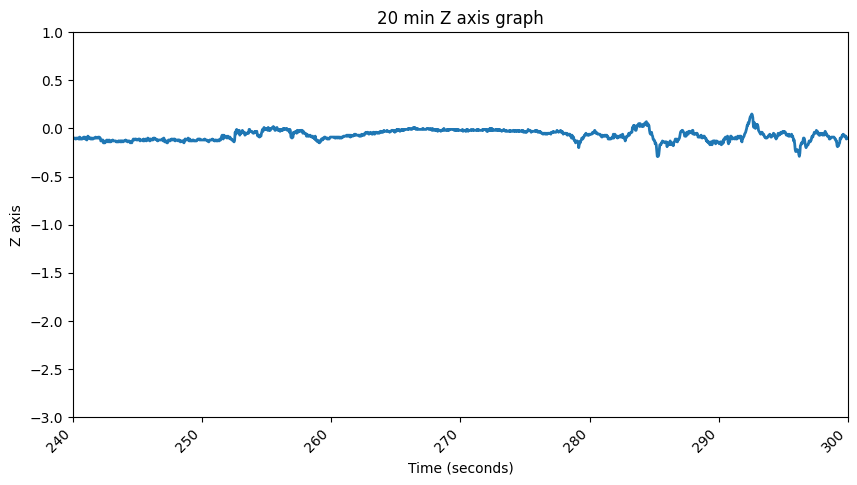

In [18]:
# 그래프 하나 그려보기
video_path = 'C:/Users/나비/OneDrive/기울임 분석 A 그룹/Face_1W_A2_S2_landmark.mp4'
cap = cv2.VideoCapture(video_path)

# 비디오 프레임 수 가져오기
fps = cap.get(cv2.CAP_PROP_FPS)

'''
# 전체 그래프를 그리고 싶을 때
total_seconds = 1200
'''
start_seconds = 4*60 # 시작할 부분의 시간
end_seconds = 5*60 # 끝낼 부분의 시간
total_seconds = end_seconds - start_seconds # 보여줄 전체 시간


total_frames = int(fps * total_seconds)
years = np.arange(0, total_seconds, 1/fps)

# 1초 단위가 아닌 프레임 단위
data_xlse = pd.read_csv('C:/Users/나비/OneDrive/기울임 분석 A 그룹/head_pose_coordinates_A2.csv')
data = data_xlse['Z'] # box 중점의 y좌표 값을 기준.

#  보여줄 시간을 정했을 때, 그 부분에 대해서만 보여주기 위해 지정하는 부분.
#data_trimmed = data[:len(years)]


# 특정 구간을 보여주기 위해 선언.
start_frame = int(start_seconds * fps)
end_frame = int(end_seconds * fps)
data_trimmed = data[start_frame:end_frame] # start 시간부터 end 시간까지를 보여줌.

fig, ax = plt.subplots(figsize=(10,5))
line, = ax.plot(years, data_trimmed, lw=2)

y_min = np.floor(data.min()) # 주어진 숫자의 소수점 이하를 버리고, 정수 부분만 남기는 함수
y_max = np.ceil(data.max()) # 인수로 받은 숫자를 반올림하여 반환.

ax.set_ylim(y_min, y_max) # set_ylim의 경우, y축의 최솟값, 최댓값을 설정. 

# x 축을 30초 단위로 눈금 설정
xticks = np.arange(0, total_seconds + 1, 10)
ax.set_xticks(xticks)
#ax.set_xticklabels(xticks)
ax.set_xticklabels((xticks + start_seconds).astype(int)) # 시작하는 부분의 숫자를 x 레이블에 표시.
plt.xticks(rotation=45, ha='right')
ax.set_xlim(0, total_seconds)

# 그래프 제목 및 라벨 설정
ax.set_title('20 min Z axis graph')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Z axis')

# 그래프 보여주기
plt.show()

# 캡처 해제
cap.release()